In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
label_dict_Z = {
    "0": r"$Z_{L_1}$",
    "1": r"$Z_{L_2}$",
    "2": r"$Z_{L_3}$",
    "3": r"$Z_{L_4}$",
    "4": r"$Z_{L_5}$",
    "5": r"$Z_{L_6}$",
}
label_dict_X = {
    "0": r"$X_{L_1}$",
    "1": r"$X_{L_2}$",
    "2": r"$X_{L_3}$",
}
label_colors_1 = list(matplotlib.colors.TABLEAU_COLORS.keys())
label_colors_2 = ["tab:olive", "tab:gray", "tab:cyan"]

# Fig2.A

In [3]:
fig2a_data = scipy.io.loadmat("fig2a.mat", simplify_cells=True)
Zs_exp_avg = fig2a_data["Zs_exp_avg"]
Zs_exp_err = fig2a_data["Zs_exp_err"]
Zs_sim_avg = fig2a_data["Zs_sim_avg"]
Xs_exp_avg = fig2a_data["Xs_exp_avg"]
Xs_exp_err = fig2a_data["Xs_exp_err"]
Xs_sim_avg = fig2a_data["Xs_sim_avg"]

Text(0.5, 0.98, 'Fig.2a $\\{X_{L_i}\\}$')

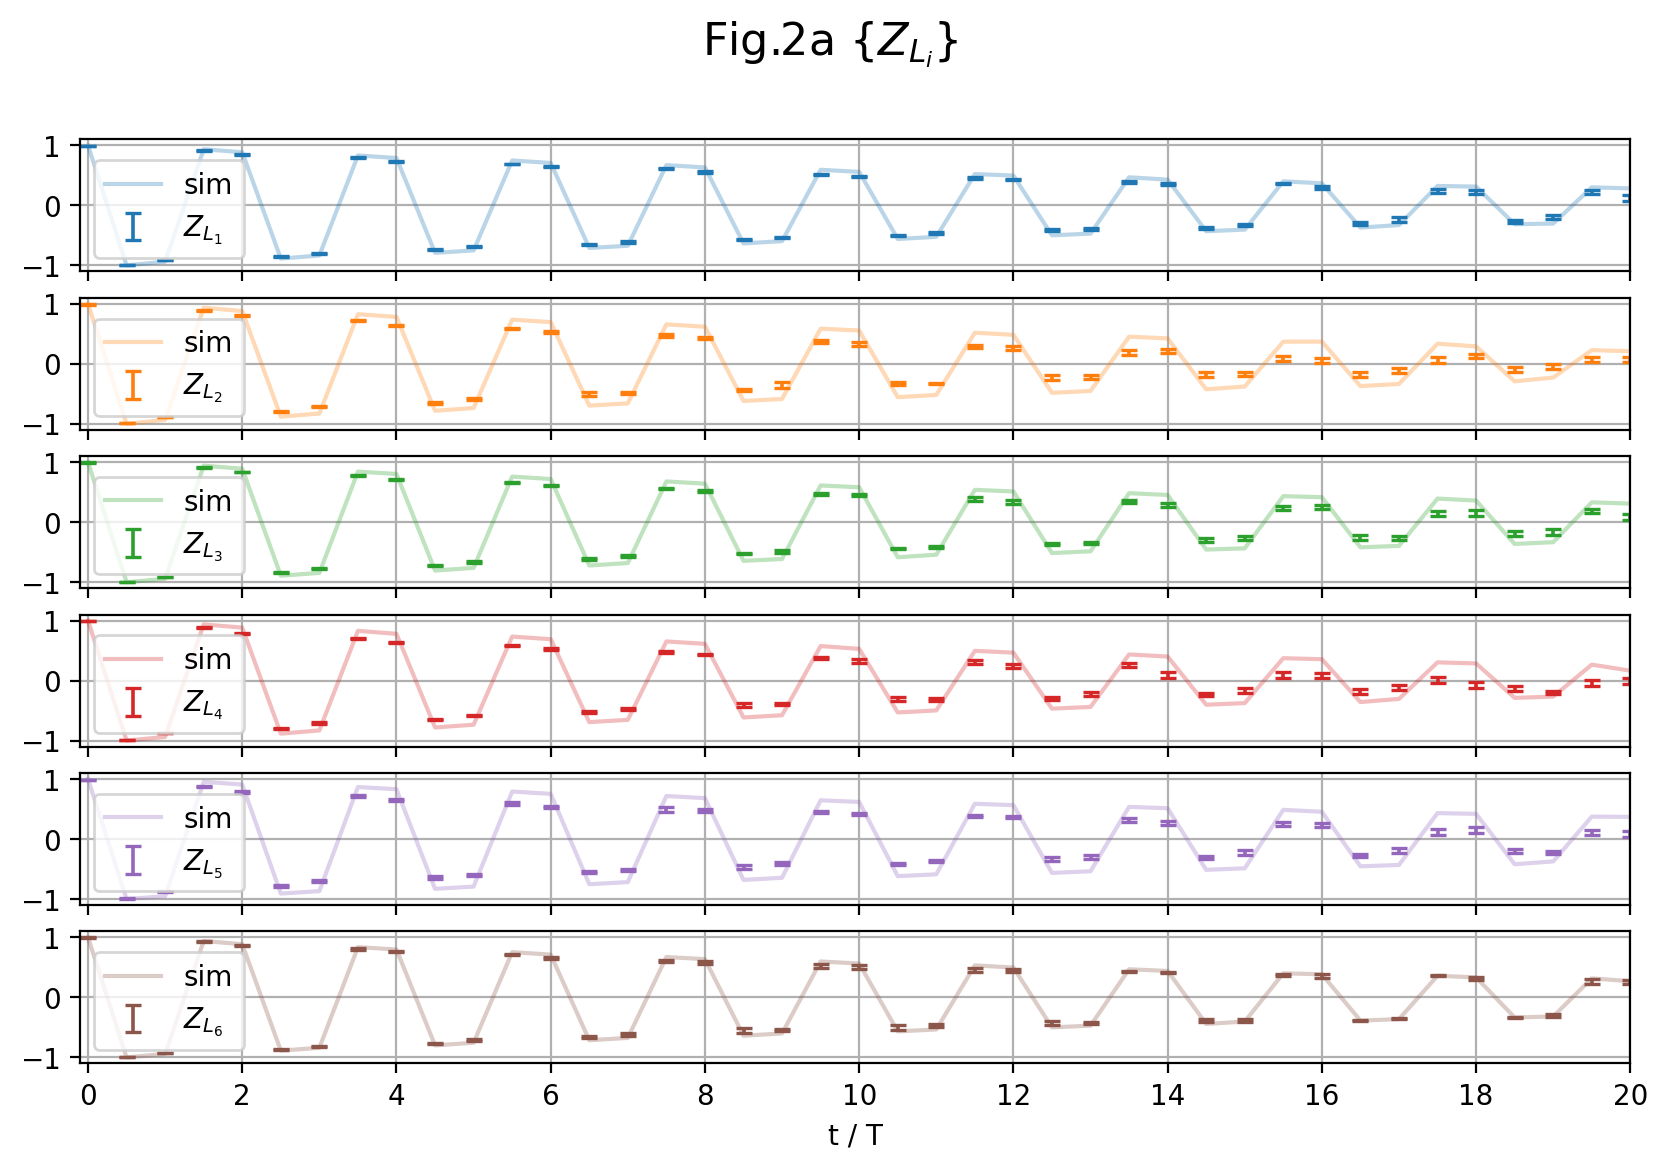

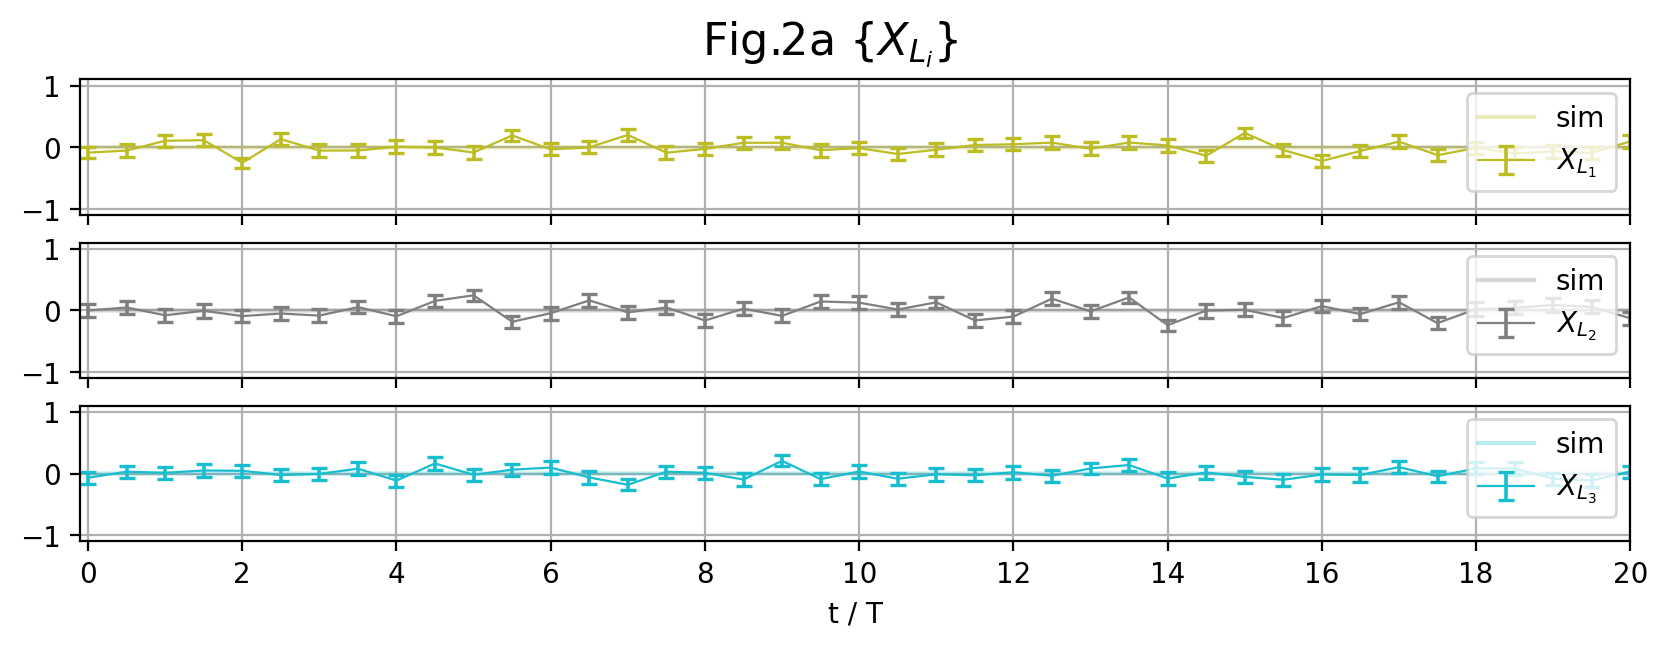

In [4]:
fig = plt.figure(figsize=(10, 6), dpi=200)
axes = fig.subplots(nrows=len(label_dict_Z), ncols=1, sharex=True)
ts = np.arange(np.shape(Zs_exp_avg)[1]) / 2
for i in range(len(label_dict_Z.keys())):
    axes[i].errorbar(
        ts,
        Zs_exp_avg[i, :],
        Zs_exp_err[i, :],
        label=label_dict_Z[f"{i}"],
        color=label_colors_1[i],
        elinewidth=1.3,
        ls="none",
        linewidth=0.8,
        capsize=2.8,
        capthick=1.2,
    )
    axes[i].plot(
        ts,
        Zs_sim_avg[i, :],
        label=f"sim",
        color=label_colors_1[i],
        alpha=0.3,
    )
    axes[i].set_ylim([-1.1, 1.1])
    axes[i].set_xlim([-0.1, ts[-1]])
    axes[i].legend()
    axes[i].grid()
    if i != len(label_dict_Z.keys()) - 1:
        axes[i].set_xticklabels([])
    else:
        axes[i].set_xticks(ts[::4])
        axes[i].set_xticklabels(np.array(ts[::4], int))
axes[-1].set_xlabel("t / T")
fig.suptitle("Fig.2a" + r" $\{Z_{L_i}\}$", fontsize=16)


fig = plt.figure(figsize=(10, 3), dpi=200)
axes = fig.subplots(nrows=len(label_dict_X), ncols=1, sharex=True)
for i in range(len(label_dict_X.keys())):
    axes[i].errorbar(
        ts,
        Xs_exp_avg[i, :],
        Xs_exp_err[i, :],
        label=label_dict_X[f"{i}"],
        color=label_colors_2[i],
        elinewidth=1.3,
        linewidth=0.8,
        capsize=2.8,
        capthick=1.2,
    )
    axes[i].plot(
        ts,
        Xs_sim_avg[i, :],
        label=f"sim",
        color=label_colors_2[i],
        alpha=0.3,
    )
    axes[i].set_ylim([-1.1, 1.1])
    axes[i].set_xlim([-0.1, ts[-1]])
    axes[i].legend()
    axes[i].grid()
    if i != len(label_dict_X.keys()) - 1:
        axes[i].set_xticklabels([])
    else:
        axes[i].set_xticks(ts[::4])
        axes[i].set_xticklabels(np.array(ts[::4], int))
axes[-1].set_xlabel("t / T")
fig.suptitle("Fig.2a" + r" $\{X_{L_i}\}$", fontsize=16)

# Fig2.B

In [5]:
fig2b_data = scipy.io.loadmat("fig2b.mat", simplify_cells=True)
Zs_exp_fft = fig2b_data["Zs_exp_fft"]
Xs_exp_fft = fig2b_data["Xs_exp_fft"]
freqs = fig2b_data["freqs"]

([<matplotlib.axis.XTick at 0x14271a6f0>,
 [Text(0.0, 0, '0'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.5'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.0')])

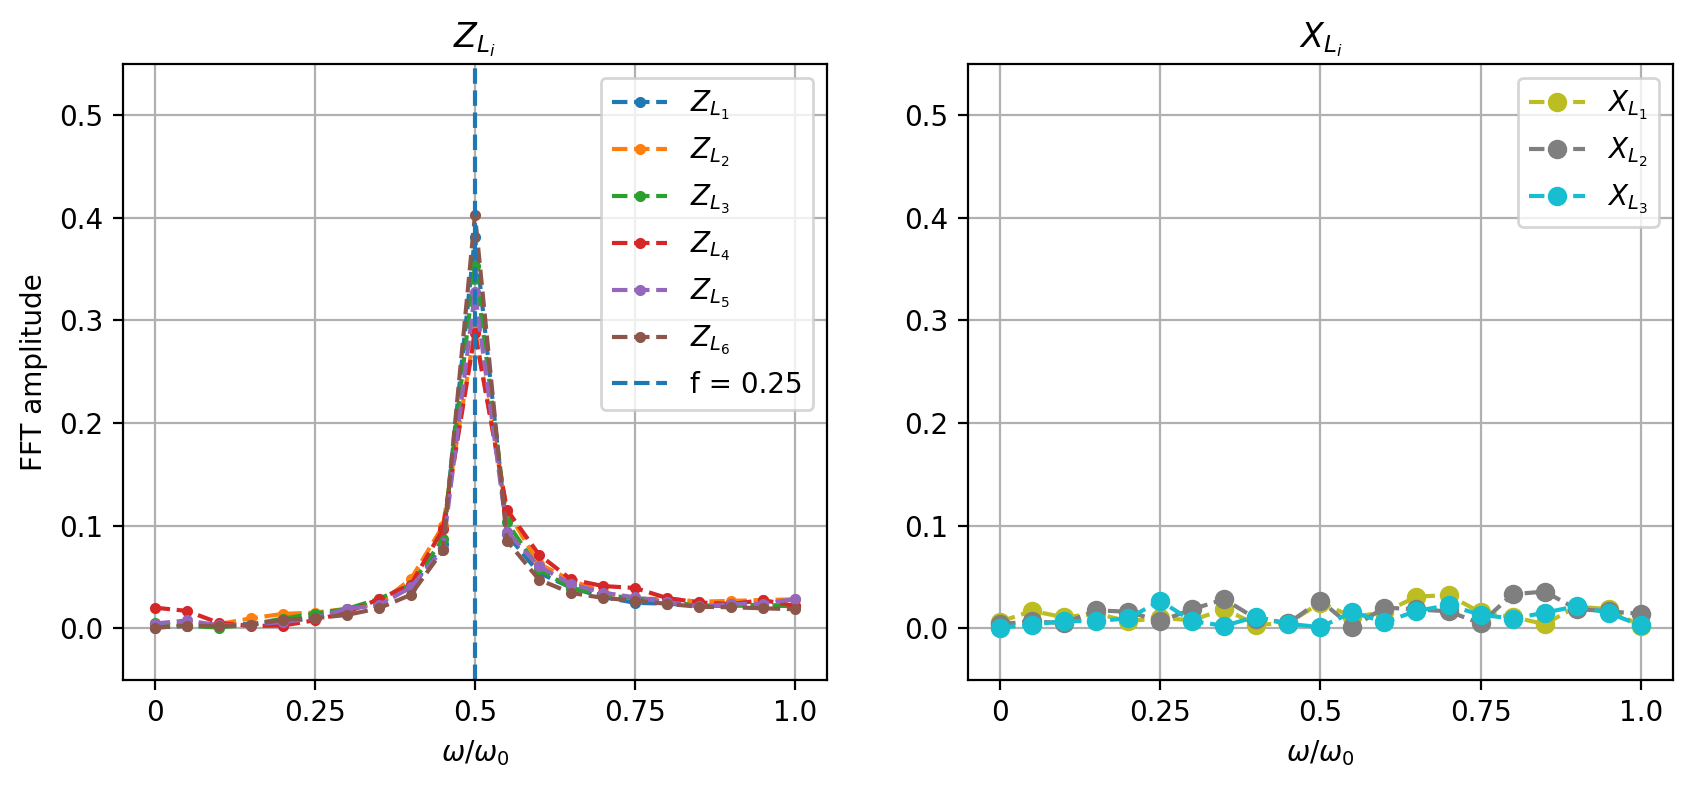

In [6]:
plt.figure(figsize=(10, 4), dpi=200)
plt.subplot(121)
for i in range(6):
    plt.plot(
        freqs,
        Zs_exp_fft[i, :],
        ".--",
        label=label_dict_Z[f"{i}"],
        color=label_colors_1[i],
    )
plt.axvline(x=0.5, label="f = 0.25", ls="--")
plt.ylim([-0.05, 0.55])
plt.grid()
plt.legend()
plt.title(r"$Z_{L_i}$")
plt.ylabel("FFT amplitude")
plt.xlabel(r"$\omega / \omega_0$")
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], [0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(122)
for i in range(3):
    plt.plot(
        freqs,
        Xs_exp_fft[i, :],
        "o--",
        label=label_dict_X[f"{i}"],
        color=label_colors_2[i],
    )
plt.ylim([-0.05, 0.55])
plt.grid()
plt.legend()
plt.title(r"$X_{L_i}$")
plt.xlabel(r"$\omega / \omega_0$")
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], [0, 0.25, 0.5, 0.75, 1.0])

# Fig2.C

In [7]:
fig2c_data = scipy.io.loadmat("fig2c.mat", simplify_cells=True)
Asigmaz_avg = fig2c_data["Asigmaz_avg"]
ts = fig2c_data["ts"]

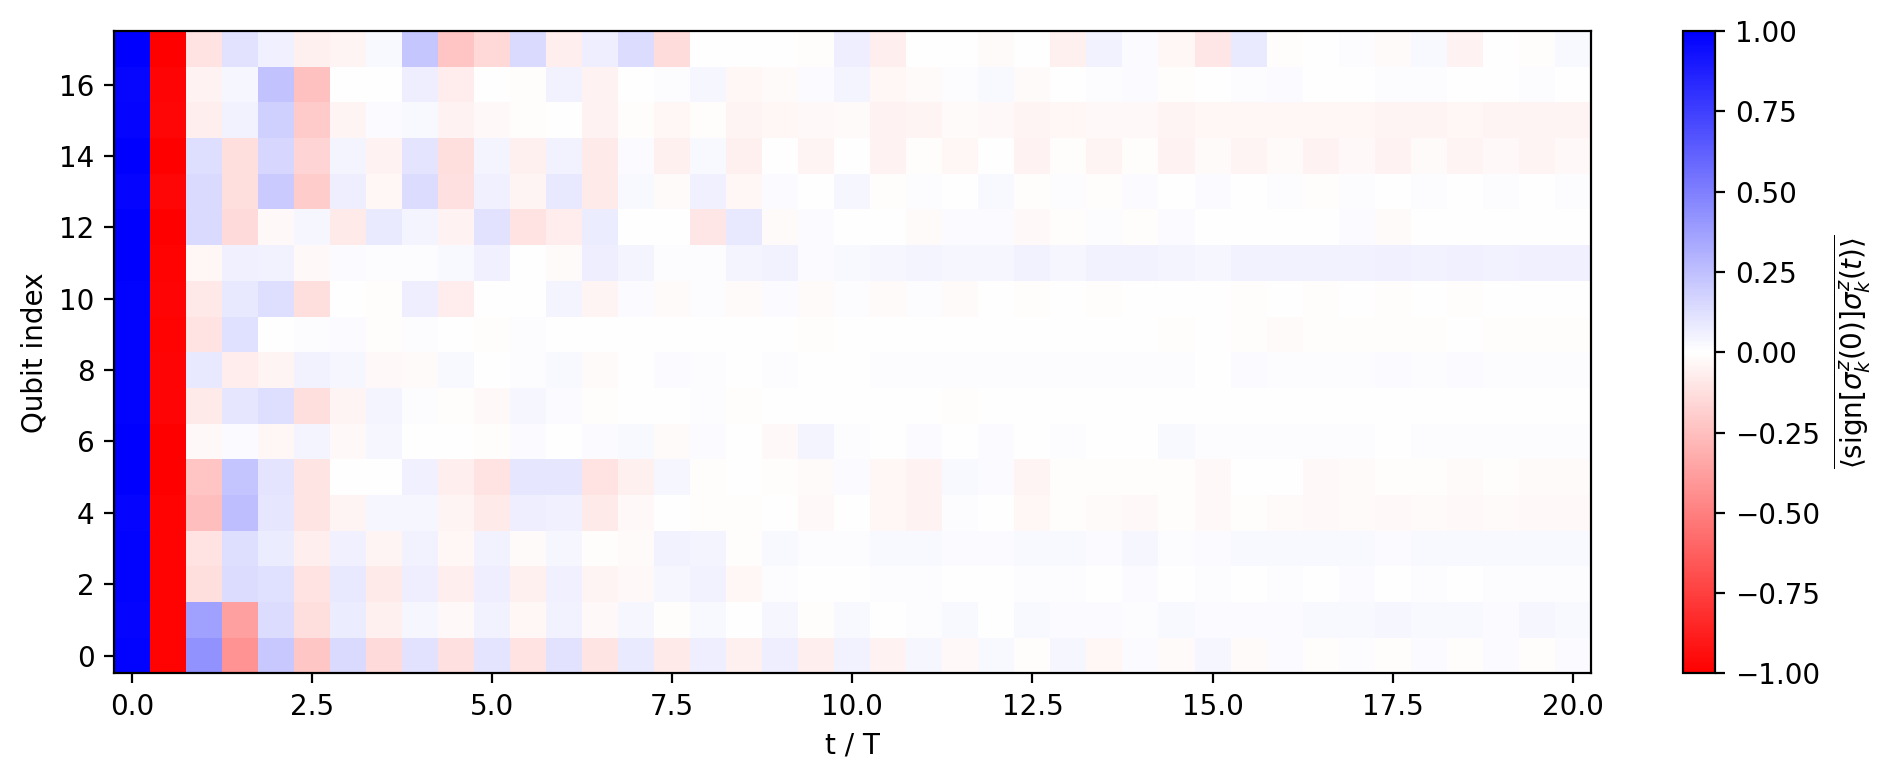

In [8]:
plt.figure(figsize=(10, 4), dpi=200)
plt.subplot()
xx, yy = np.meshgrid(ts, [int(i) for i in np.arange(0, len(Asigmaz_avg), 1)])
plt.pcolormesh(
    xx, yy, Asigmaz_avg[:, :], shading="nearest", vmin=-1.0, vmax=1.0, cmap="bwr_r"
)
plt.colorbar(
    label=r"$\overline{\langle {\rm sign}[\sigma_k^z(0)] \sigma_k^z(t) \rangle}$"
)
plt.xlabel("t / T")
plt.ylabel("Qubit index")
plt.tight_layout()